In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import string
import time

import numpy as np
import pandas as pd

from dist_analysis.stats import (check_alternative_urls,
                                 get_distribution_info,
                                 get_distribution_update_stats,
                                 get_distributions_list,
                                 get_names_stats)
from dist_analysis.visualization import plot_names_with_punctuation

In [3]:
IMAGE_DATA_PATH = Path('../images')

base_url = 'https://pypi.python.org/pypi'

### Get list of all packages

In [4]:
distributions = get_distributions_list(base_url)
distributions_count = len(distributions)
print(distributions_count)

378380


### Find all used chars in distributions names

In [5]:
name_chars = set(''.join(distributions))
print(''.join(sorted(name_chars)))

-.0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ_abcdefghijklmnopqrstuvwxyz


### Get stats for different package name types

In [6]:
no_char = set()
hyphen = set('-')
underscore = set('_')
dot = set('.')
punctuation = hyphen | underscore | dot
digits = set(string.digits)
letters = set(string.ascii_letters)

**Only letters**

In [7]:
names_letters = get_names_stats(distributions, letters)

Possible chars: ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
Required chars: 
Names count: 178642
Names proportion: 0.47212
Examples: ['pyinstrument', 'blackhorse', 'WordPressAutoPost', 'gitcidi', 'surelink']



**Only digits**

In [8]:
names_digits = get_names_stats(distributions, digits)

Possible chars: 0123456789
Required chars: 
Names count: 40
Names proportion: 0.00011
Examples: ['31', '2021', '42', '1', '5']



**Only punctuation**

In [9]:
names_punctuation = get_names_stats(distributions, punctuation)

Possible chars: -._
Required chars: 
Names count: 0
Names proportion: 0.00000



**Letters and digits**

In [10]:
letters_digits = letters | digits
names_letters_digits = get_names_stats(distributions, letters_digits)

Possible chars: 0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
Required chars: 
Names count: 192850
Names proportion: 0.50967
Examples: ['vote4film', 'chd', 'irate', 'queryswap', 'referredby']



**Letters and punctuation**

In [11]:
letters_punctuation = letters | punctuation
names_letters_punctuation = get_names_stats(distributions, letters_punctuation)

Possible chars: -.ABCDEFGHIJKLMNOPQRSTUVWXYZ_abcdefghijklmnopqrstuvwxyz
Required chars: 
Names count: 336830
Names proportion: 0.89019
Examples: ['drake', 'ADLStream', 'pylibimport', 'tendril-utils-types', 'gFunctionLibrary']



**With hyphens**

In [12]:
names_with_hyphens = get_names_stats(distributions, name_chars, required_chars=hyphen)

Possible chars: -.0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ_abcdefghijklmnopqrstuvwxyz
Required chars: -
Names count: 163013
Names proportion: 0.43082
Examples: ['bot-kit', 'leabra-psyneulink', 'scrapy-bigquery', 'python-devlog', 'odoo10-addon-pos-remove-pos-category']



**With underscores**

In [13]:
names_with_underscores = get_names_stats(distributions, name_chars, required_chars=underscore)

Possible chars: -.0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ_abcdefghijklmnopqrstuvwxyz
Required chars: _
Names count: 11203
Names proportion: 0.02961
Examples: ['bootstrap_admin_legacy', 'demo_pkg_lfr', 'nest_pf', 'xmldict_translate', 'js.jquery_formwizard']



**With dots**

In [14]:
names_with_dots = get_names_stats(distributions, name_chars, required_chars=dot)

Possible chars: -.0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ_abcdefghijklmnopqrstuvwxyz
Required chars: .
Names count: 13719
Names proportion: 0.03626
Examples: ['kss.django', 'cloudsnorkel.cdk-github-runners', 'mpdg.govbr.observatorio', 'aw.managersmanager', 'huscy.data-protection']



**With only hyphens**

In [15]:
names_with_only_hyphens = get_names_stats(distributions, letters_digits | hyphen, 
                                          required_chars=hyphen)

Possible chars: -0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
Required chars: -
Names count: 161001
Names proportion: 0.42550
Examples: ['fake-ssh', 'requests-async-session', 'neocrym-sphinx-theme', 'skyline-log', 'send-2-kindle']



**With only underscores**

In [16]:
names_with_only_underscores = get_names_stats(distributions, letters_digits | underscore, 
                                              required_chars=underscore)

Possible chars: 0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ_abcdefghijklmnopqrstuvwxyz
Required chars: _
Names count: 10650
Names proportion: 0.02815
Examples: ['nextcloud_news_updater', 'nose_priority', 'dms_tools', 'responses_proxy', 'test_python_package']



**With only dots**

In [17]:
names_with_only_dots = get_names_stats(distributions, letters_digits | dot, 
                                       required_chars=dot)

Possible chars: .0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
Required chars: .
Names count: 11487
Names proportion: 0.03036
Examples: ['plone.introspector', 'RBX.py', 'danse.ins', 'Products.MegamanicEditContentTypes', 'imio.email.parser']



**With all punctuation**

In [18]:
names_with_all_punctuation = get_names_stats(distributions, letters_digits | punctuation, 
                                             required_chars=punctuation)

Possible chars: -.0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ_abcdefghijklmnopqrstuvwxyz
Required chars: -._
Names count: 13
Names proportion: 0.00003
Examples: ['vision_utils-0.1.1', '0-._.-._.-._.-._.-._.-._.-0', 'sloth-ci.ext.docker_exec', 'repoze.who-use_beaker', 'sloth-ci.ext.shields_io']



In [19]:
names_with_all_punctuation

['sloth-ci.ext.docker_exec',
 '0-._.-._.-._.-._.-._.-._.-0',
 'Dragon_Module.pre-Alpha',
 'sloth-ci.ext.shields_io',
 'repoze.who-use_beaker',
 'sloth-ci.ext.file_logs',
 'sloth-ci.ext.ssh_exec',
 'motmot.realtime_image_analysis-ipp',
 'sloth-ci.ext.build_email_notifications',
 'sloth-ci.ext.openvz_exec',
 'vision_utils-0.1.1',
 'sloth-ci.ext.robots_txt',
 'carson-tool.create_template']

### Get package update statistics

In [20]:
distribution_update_stats, incorrect_distributions = get_distribution_update_stats(base_url, names_with_all_punctuation)
len(distribution_update_stats), len(incorrect_distributions)

100%|███████████████████████████████████████████| 13/13 [00:03<00:00,  3.26it/s]


(11, 2)

In [21]:
distribution_stats = pd.Series(distribution_update_stats)
distribution_stats.sort_values()

repoze.who-use_beaker                    2009-12-08 15:36:32.669153+00:00
motmot.realtime_image_analysis-ipp       2012-06-01 10:43:23.315136+00:00
sloth-ci.ext.docker_exec                 2016-02-21 14:10:14.466712+00:00
sloth-ci.ext.file_logs                   2016-02-21 14:11:41.123975+00:00
sloth-ci.ext.openvz_exec                 2016-02-21 14:12:56.365206+00:00
sloth-ci.ext.robots_txt                  2016-02-21 14:13:20.135383+00:00
sloth-ci.ext.ssh_exec                    2016-02-21 14:13:52.543088+00:00
sloth-ci.ext.shields_io                  2016-03-17 11:10:23.393115+00:00
sloth-ci.ext.build_email_notifications   2016-03-18 23:17:22.851842+00:00
vision_utils-0.1.1                       2019-05-08 19:25:20.515623+00:00
carson-tool.create_template              2019-10-29 10:46:27.996564+00:00
dtype: datetime64[ns, tzutc()]

In [22]:
incorrect_distributions

{'0-._.-._.-._.-._.-._.-._.-0': IndexError('list index out of range'),
 'Dragon_Module.pre-Alpha': requests.exceptions.HTTPError('404 Client Error: Not Found for url: https://pypi.org/pypi/Dragon_Module.pre-Alpha/json')}

### Check URL variants

In [23]:
distribution_name = distribution_stats[distribution_stats == distribution_stats.max()].index.item()
distribution_name

'carson-tool.create_template'

In [24]:
distribution_info = get_distribution_info(base_url, distribution_name)['info']
distribution_info

{'author': 'Carson',
 'author_email': 'jackparadise520a@gmail.com',
 'bugtrack_url': None,
 'classifiers': ['Development Status :: 5 - Production/Stable',
  'License :: OSI Approved :: Apache Software License',
  'Natural Language :: Chinese (Traditional)',
  'Natural Language :: English',
  'Operating System :: Microsoft',
  'Programming Language :: Python :: 3.6',
  'Programming Language :: Python :: 3.7',
  'Programming Language :: Python :: 3.8',
  'Topic :: System :: Filesystems'],
 'description': '===================\nCreate Template\n===================\n\n:Source Code: https://github.com/CarsonSlovoka/carson-tool.create_template/blob/master/Carson/Tool/CreateTemplate/create_template.py\n:Compatible: Python >3.6\n:Platform: Windows\n:License: `Apache 2.0`_\n:Author Doc: https://carsonslovoka.github.io/CarsonDoc/\n\n.. sectnum::\n\nFile templates are specifications of the default contents to be generated when creating a new file.\n\nThis Script helps you create the template file 

In [25]:
distribution_url = distribution_info['project_url']
distribution_url

'https://pypi.org/project/carson-tool.create_template/'

In [26]:
check_alternative_urls(distribution_name)

https://pypi.python.org/project/carson.tool.create_template -> https://pypi.org/project/carson-tool.create_template/
https://pypi.python.org/project/carson_tool.create_template -> https://pypi.org/project/carson-tool.create_template/
https://pypi.python.org/project/carson-tool-create_template -> https://pypi.org/project/carson-tool.create_template/
https://pypi.python.org/project/carson-tool_create_template -> https://pypi.org/project/carson-tool.create_template/
https://pypi.python.org/project/carson-tool.create-template -> https://pypi.org/project/carson-tool.create_template/
https://pypi.python.org/project/carson-tool.create.template -> https://pypi.org/project/carson-tool.create_template/


### Visualize Python distribution names with punctuation

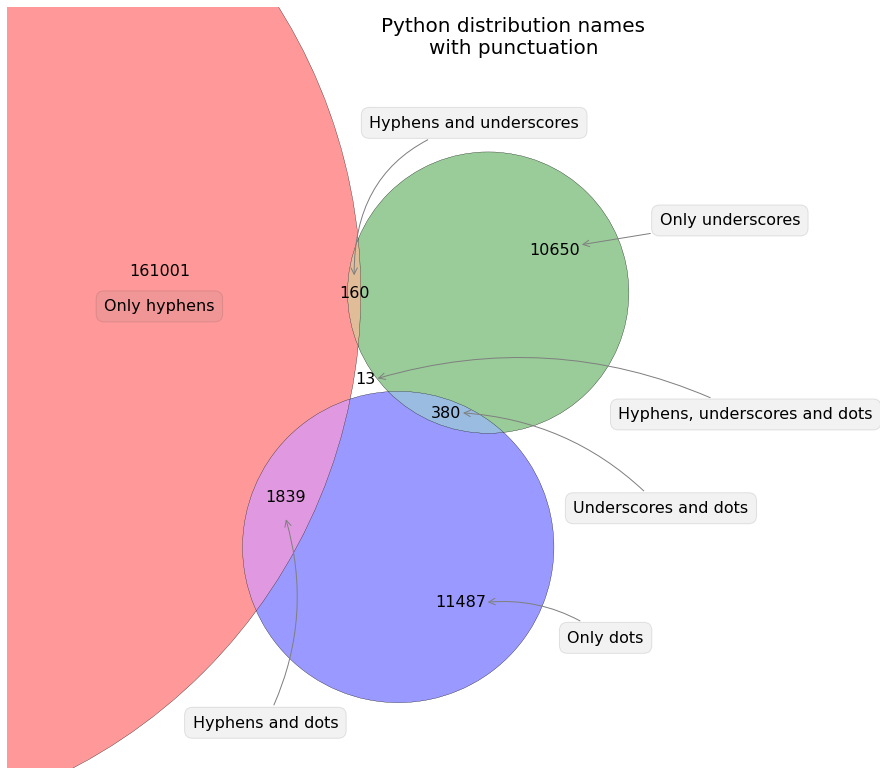

In [27]:
diagram_file_path = IMAGE_DATA_PATH / 'names_with_punctuation.png' 

plot_names_with_punctuation(names_with_hyphens, names_with_underscores, names_with_dots,
                            image_file_path=diagram_file_path)